# IMPLEMENTER UN MODELE DE SCORING

## Notebook de nettoyage des données

Après avoir analysé les données et selectionné les features les plus pertinentes dans le premier notebook, nous allons nettoyer le dataframe avant decommencer la modélisation.

Nous allons :
- supprimer les doublons
- traiter les valeurs manquantes et les valeurs extrêmes
- transformer les données catégorielles

In [1]:
# Import des librairies 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import missingno as msno 
import warnings
warnings.filterwarnings('ignore')

# Import des données
df = pd.read_csv('df_fin_p7.csv')
df = df.set_index('SK_ID_CURR')
df.shape

(307511, 147)

# RETRAIT DES DOUBLONS ET DES NANs

In [2]:
df.duplicated().sum() #nombre de doublon

84262

In [3]:
df = df.drop_duplicates() #suppression du doublon
df.duplicated().sum() #vérification que la suppression du doublon a bien été effectuée

0

<AxesSubplot:>

<Figure size 576x288 with 0 Axes>

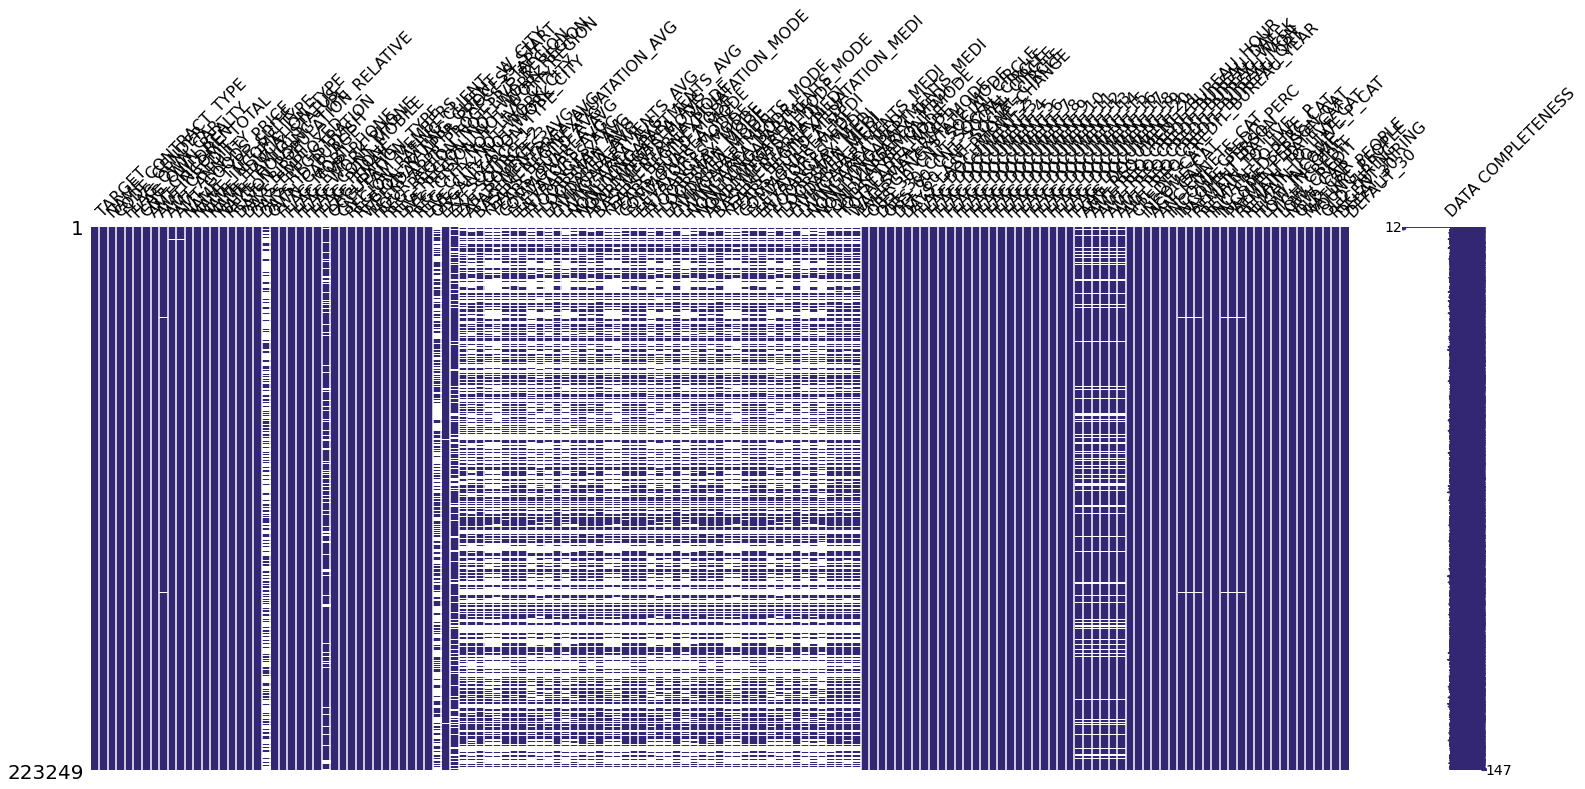

In [4]:
# Visualisation des nan de X
plt.figure(figsize=(8,4))
msno.matrix(df,labels = True, color=(0.20,0.15,0.45))

In [5]:
df.isna().mean() # taux de valeurs manquantes

TARGET                0.000004
NAME_CONTRACT_TYPE    0.000004
CODE_GENDER           0.000004
FLAG_OWN_CAR          0.000004
FLAG_OWN_REALTY       0.000004
                        ...   
YOUNG_PEOPLE          0.000000
OLD_HIRING            0.000000
RECENT_HIRING         0.000000
DELAY_30              0.000000
DEFAUT_30             0.000000
Length: 147, dtype: float64

In [6]:
def histogramm_for_nan(df):
    '''
    Permet d'afficher le taux de données manquanets par lignes et par colonnes.
    df:
       datframe sur lequel appliquer la fonction
    '''
    missing_col = df.isna().mean(axis=0)
    missing_row = df.isna().mean(axis=1)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
    fig.suptitle('Taux de données manquantes')
    
    ax1.hist(missing_col)
    ax1.set_title('Par colonnes')
    ax1.set_xlabel('Taux de données manquantes')
    ax1.set_ylabel('Nombre de colonne')
    
    ax2.hist(missing_row)
    ax2.set_title('Par lignes')
    ax2.set_xlabel('Taux de données manquantes')
    ax2.set_ylabel('Nombre de lignes')
    
    plt.show()

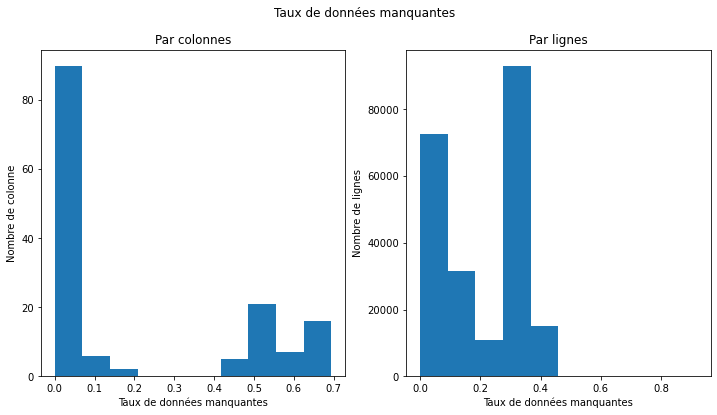

(223249, 147)

In [7]:
# Visualisation des données manquantes
histogramm_for_nan(df)
df.shape

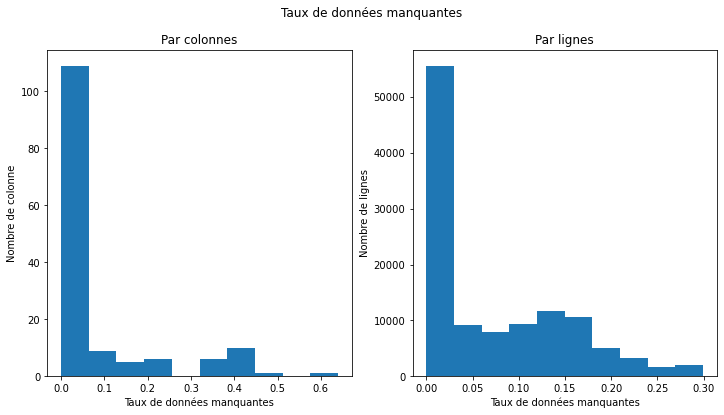

(116182, 147)

In [8]:
# Supprime les lignes ayant des nan
nan_rate_row = df.isna().mean(axis=1)
nan_rate_row>=0.3
row_to_remove = nan_rate_row.loc[nan_rate_row>=0.3].index
df=df.drop(row_to_remove)

# Visualisation des données manquantes
histogramm_for_nan(df)
df.shape

# One Hot Encoding

In [9]:
df.dtypes[df.dtypes == object]

NAME_CONTRACT_TYPE            object
CODE_GENDER                   object
FLAG_OWN_CAR                  object
FLAG_OWN_REALTY               object
NAME_TYPE_SUITE               object
NAME_INCOME_TYPE              object
NAME_EDUCATION_TYPE           object
NAME_FAMILY_STATUS            object
NAME_HOUSING_TYPE             object
OCCUPATION_TYPE               object
WEEKDAY_APPR_PROCESS_START    object
ORGANIZATION_TYPE             object
FONDKAPREMONT_MODE            object
HOUSETYPE_MODE                object
WALLSMATERIAL_MODE            object
EMERGENCYSTATE_MODE           object
CREDIT_CAT                    object
INCOME_CAT                    object
AGE_CAT                       object
ANCIENNETE_CAT                object
INC_CRED_PERC_CAT             object
INCOME_PERSON_CAT             object
PAYMENT_RATE_CAT              object
REMAIN_TO_LIVE_CAT            object
REMAIN_TO_LIVE_P_CAT          object
dtype: object

Features catégorielles codées en int :
- TARGET : Variable cible (0 ou 1)
- REGION_RATING_CLIENT : Note donnée à la région du client (1, 2 ou 3)

In [10]:
#Features catégorielles à encoder :
dummies1 = pd.get_dummies(df['CODE_GENDER'])
dummies1

,F,M,XNA
SK_ID_CURR,,,
100002.0,0,1,0
100003.0,1,0,0
100016.0,1,0,0
100017.0,0,1,0
100018.0,1,0,0
...,...,...,...
456245.0,1,0,0
456251.0,0,1,0
456253.0,1,0,0


In [11]:
df = pd.concat([df, dummies1], axis=1)
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,OLD_CAR,MATURE_PEOPLE,YOUNG_PEOPLE,OLD_HIRING,RECENT_HIRING,DELAY_30,DEFAUT_30,F,M,XNA
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002.0,1.0,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,351000.0,...,0,0,1,0,1,1,1,0,1,0
100003.0,0.0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0,1,0,1,0,0
100016.0,0.0,Cash loans,F,N,Y,0.0,67500.0,80865.0,5881.5,67500.0,...,0,0,0,0,0,0,0,1,0,0
100017.0,0.0,Cash loans,M,Y,N,1.0,225000.0,918468.0,28966.5,697500.0,...,1,0,0,0,0,0,0,0,1,0
100018.0,0.0,Cash loans,F,N,Y,0.0,189000.0,773680.5,32778.0,679500.0,...,0,0,0,0,1,0,0,1,0,0


In [12]:
dummies2 = pd.get_dummies(df['FLAG_OWN_REALTY'])
df = pd.concat([df, dummies2], axis=1)

In [13]:
dummies3 = pd.get_dummies(df['NAME_FAMILY_STATUS'])
df = pd.concat([df, dummies3], axis=1)

In [14]:
dummies4 = pd.get_dummies(df['NAME_INCOME_TYPE'])
df = pd.concat([df, dummies4], axis=1)

In [15]:
dummies5 = pd.get_dummies(df['AGE_CAT'])
df = pd.concat([df, dummies5], axis=1)

In [16]:
dummies6 = pd.get_dummies(df['INCOME_CAT'])
df = pd.concat([df, dummies6], axis=1)

In [17]:
dummies7 = pd.get_dummies(df['CREDIT_CAT'])
df = pd.concat([df, dummies7], axis=1)

In [18]:
dummies8 = pd.get_dummies(df['REGION_RATING_CLIENT'])
df = pd.concat([df, dummies8], axis=1)

In [19]:
dummies9 = pd.get_dummies(df['INC_CRED_PERC_CAT'])
df = pd.concat([df, dummies9], axis=1)

In [20]:
dummies10 = pd.get_dummies(df['INCOME_PERSON_CAT'])
df = pd.concat([df, dummies10], axis=1)

In [21]:
dummies11 = pd.get_dummies(df['PAYMENT_RATE_CAT'])
df = pd.concat([df, dummies11], axis=1)

In [22]:
dummies12 = pd.get_dummies(df['REMAIN_TO_LIVE_CAT'])
df = pd.concat([df, dummies12], axis=1)

In [23]:
dummies13 = pd.get_dummies(df['NAME_CONTRACT_TYPE'])
df = pd.concat([df, dummies13], axis=1)

In [24]:
dummies14 = pd.get_dummies(df['FLAG_OWN_CAR'])
df = pd.concat([df, dummies14], axis=1)

In [25]:
dummies15 = pd.get_dummies(df['NAME_TYPE_SUITE'])
df = pd.concat([df, dummies15], axis=1)

In [26]:
dummies16 = pd.get_dummies(df['NAME_EDUCATION_TYPE'])
df = pd.concat([df, dummies16], axis=1)

In [27]:
dummies17 = pd.get_dummies(df['NAME_HOUSING_TYPE'])
df = pd.concat([df, dummies17], axis=1)

In [28]:
dummies18 = pd.get_dummies(df['OCCUPATION_TYPE'])
df = pd.concat([df, dummies18], axis=1)

In [29]:
dummies19 = pd.get_dummies(df['WEEKDAY_APPR_PROCESS_START'])
df = pd.concat([df, dummies19], axis=1)

In [30]:
dummies20 = pd.get_dummies(df['ORGANIZATION_TYPE'])
df = pd.concat([df, dummies20], axis=1)

In [31]:
dummies21 = pd.get_dummies(df['FONDKAPREMONT_MODE'])
df = pd.concat([df, dummies21], axis=1)

In [32]:
dummies22 = pd.get_dummies(df['HOUSETYPE_MODE'])
df = pd.concat([df, dummies12], axis=1)

In [33]:
dummies23 = pd.get_dummies(df['WALLSMATERIAL_MODE'])
df = pd.concat([df, dummies13], axis=1)

In [34]:
dummies24 = pd.get_dummies(df['EMERGENCYSTATE_MODE'])
df = pd.concat([df, dummies14], axis=1)

In [35]:
dummies25 = pd.get_dummies(df['ANCIENNETE_CAT'])
df = pd.concat([df, dummies15], axis=1)

In [36]:
dummies26 = pd.get_dummies(df['REMAIN_TO_LIVE_P_CAT'])
df = pd.concat([df, dummies16], axis=1)

In [37]:
df = df.drop(['CODE_GENDER','NAME_FAMILY_STATUS', 'NAME_INCOME_TYPE', 'FLAG_OWN_REALTY', 'AGE_CAT', 'INCOME_CAT',
            'CREDIT_CAT', 'REGION_RATING_CLIENT','INC_CRED_PERC_CAT','INCOME_PERSON_CAT','PAYMENT_RATE_CAT',
              'REMAIN_TO_LIVE_CAT','NAME_CONTRACT_TYPE','FLAG_OWN_CAR','NAME_TYPE_SUITE','NAME_EDUCATION_TYPE',
              'NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE','FONDKAPREMONT_MODE',
              'HOUSETYPE_MODE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE','ANCIENNETE_CAT','REMAIN_TO_LIVE_P_CAT'], axis=1)

In [38]:
df.dtypes[df.dtypes == object]

Series([], dtype: object)

In [39]:
df.shape

(116182, 299)

In [40]:
df.to_csv('df_p7_mod.csv')